### Import necessary libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import csv of data

In [153]:
train_df = pd.read_csv("train.csv")

# Data understanding

In [154]:
train_df.shape

(1460, 81)

81 features!

In [155]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

There are a good mix of int64, float64, and object data types.

In [156]:
# Preview the dataframe
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [157]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that there are some missing values so we need to explore those.

Now we will look into the the correlations of all of the variables

<AxesSubplot:>

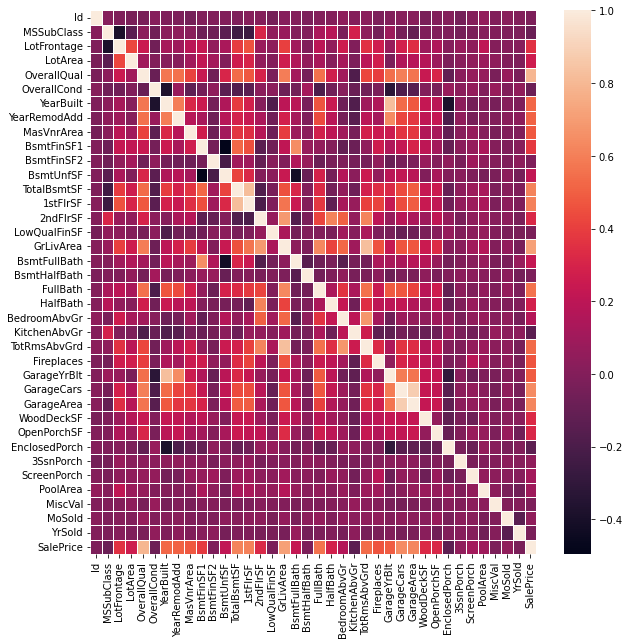

In [158]:
# correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(), linewidth=1)

There are multiple variables that are strongly correlated with SalePrice.

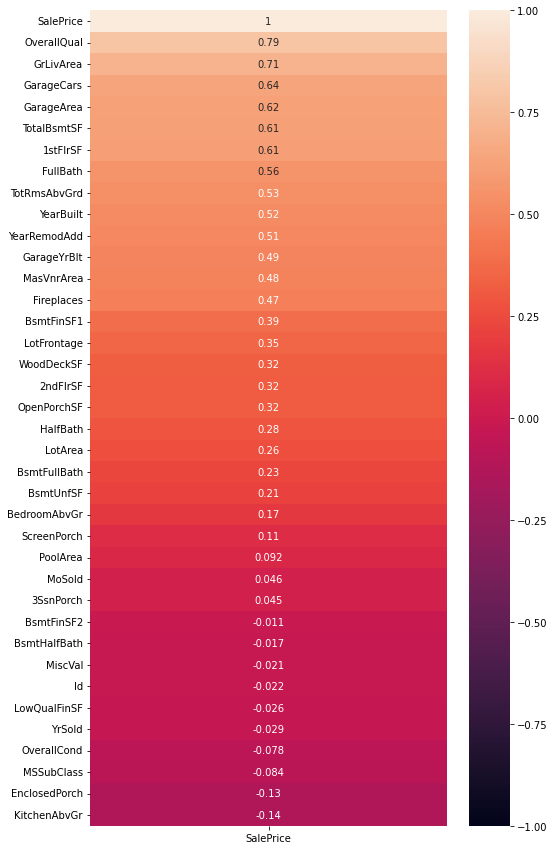

In [159]:
train_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True)

Now that we have gained insight into our dataset and some of its distributions, we can move forward into pre-processing.

# Pre-processing

### Check for missing values 

In [160]:
nulls = train_df.isna().sum()[train_df.isna().sum() > 1]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We will drop the features with missing values over 250.

In [161]:
# drop features that contain at least 250 missing values
train_df.drop(columns=train_df.isna().sum()[train_df.isna().sum() > 250].index, axis=1, inplace=True)

In [162]:
nulls = train_df.isna().sum()[train_df.isna().sum() > 1]
nulls

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [163]:
train_df.shape

(1460, 75)

We now have 75 features.

In [164]:
categoricals = list(train_df.nunique()[train_df.nunique() < len(train_df) / 5].index)
categoricals

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [165]:
len(categoricals)

64

In [166]:
# categorical values
train_cat = train_df.filter(items=categoricals)

In [167]:
# numerical values
train_num = train_df.filter(items=list(set(train_df.columns) - set(categoricals)))

In [168]:
# fill in numerical nulls with 0
train_num.fillna(value = 0, inplace = True)

In [169]:
train_num.isna().any()

SalePrice      False
LotArea        False
1stFlrSF       False
TotalBsmtSF    False
MasVnrArea     False
BsmtUnfSF      False
2ndFlrSF       False
GarageArea     False
GrLivArea      False
Id             False
BsmtFinSF1     False
dtype: bool

# Experiment 1

### Continuous features

In [170]:
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [171]:
# separate dependent from independent variables
X = train_num.drop(columns = 'SalePrice', axis = 1)
y = train_num.SalePrice

In [172]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 

In [173]:
# fit data to the linear regression model
first_linear = LinearRegression().fit(X_train, y_train)

In [174]:
# get predictions
y_pred = first_linear.predict(X_test)

In [175]:
# evaluations
print('Coefficient of Determination:', first_linear.score(X_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.6969697745021506
Mean Squared Error: 2171242100.71926
Root Mean Squared Error: 46596.588938668676


Let's add our categorical features to see if there is a difference.

### Continuous + Categorical

In [176]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train_df.Neighborhood= le.fit_transform(train_df.Neighborhood)
train_df.Condition1= le.fit_transform(train_df.Condition1)
train_df.Condition2= le.fit_transform(train_df.Condition2)
train_df.Functional= le.fit_transform(train_df.Functional)
train_df.MSZoning= le.fit_transform(train_df.MSZoning)
train_df.Street= le.fit_transform(train_df.Street)
train_df.LotShape= le.fit_transform(train_df.LotShape)
train_df.LandContour= le.fit_transform(train_df.LandContour)
train_df.Utilities= le.fit_transform(train_df.Utilities)
train_df.LotConfig= le.fit_transform(train_df.LotConfig)
train_df.LandSlope= le.fit_transform(train_df.LandSlope)
train_df.SaleType= le.fit_transform(train_df.SaleType)
train_df.SaleCondition= le.fit_transform(train_df.SaleCondition)
train_df.BldgType= le.fit_transform(train_df.BldgType)
train_df.HouseStyle= le.fit_transform(train_df.HouseStyle)
train_df.RoofStyle= le.fit_transform(train_df.RoofStyle)
train_df.RoofMatl= le.fit_transform(train_df.RoofMatl)
train_df.Exterior1st= le.fit_transform(train_df.Exterior1st)
train_df.Exterior2nd= le.fit_transform(train_df.Exterior2nd)
train_df.ExterQual= le.fit_transform(train_df.ExterQual)
train_df.ExterCond= le.fit_transform(train_df.ExterCond)
train_df.Foundation= le.fit_transform(train_df.Foundation)
train_df.Heating= le.fit_transform(train_df.Heating)
train_df.HeatingQC= le.fit_transform(train_df.HeatingQC)
train_df.CentralAir= le.fit_transform(train_df.CentralAir)
train_df.KitchenQual= le.fit_transform(train_df.KitchenQual)
train_df.PavedDrive= le.fit_transform(train_df.PavedDrive)
train_df.dropna(axis=1,inplace = True)

train_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [177]:
# separate dependent from independent variables
X2 = train_df.drop(columns = 'SalePrice', axis = 1)
y2 = train_df.SalePrice

In [178]:
# split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3) 

In [179]:
# fit data to the linear regression model
second_linear = LinearRegression().fit(X2_train, y2_train)

In [180]:
# get predictions
y2_pred = second_linear.predict(X2_test)

In [181]:
# evaluations
print('Coefficient of Determination:', second_linear.score(X2_test, y2_test))
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_pred)))

Coefficient of Determination: 0.8564509075572866
Mean Squared Error: 875845204.6659073
Root Mean Squared Error: 29594.68203353277


# Experiment 2